# 第三章　

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# ジムの利用履歴のデータ
uselog = pd.read_csv('Data100/3_data/use_log.csv')
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
log_id         197428 non-null object
customer_id    197428 non-null object
usedate        197428 non-null object
dtypes: object(3)
memory usage: 4.5+ MB


In [4]:
# 現在時点で会員の人
customer = pd.read_csv('Data100/3_data/customer_master.csv')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [5]:
# 会員区分のデータ
class_master = pd.read_csv('Data100/3_data/class_master.csv')
class_master.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [6]:
# キャンペーン区分データ(入会費無料など)
campaign_master = pd.read_csv('Data100/3_data/campaign_master.csv')
campaign_master.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [7]:
customer = customer.merge(class_master, how='left', on='class')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000


In [8]:
customer = customer.merge(campaign_master, how='left', on='campaign_id')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [9]:
customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

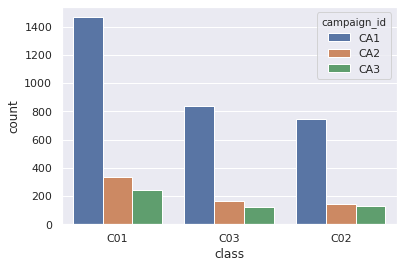

In [10]:
sns.set()
sns.countplot(x='class',hue='campaign_id', data=customer)

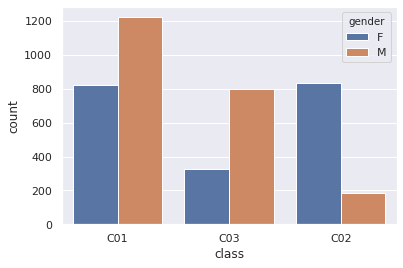

In [11]:
sns.countplot(x='class',hue='gender', data=customer)
# CO2:daytimeは女の人の方が多い傾向

In [12]:
customer['gender'].value_counts()

M    2209
F    1983
Name: gender, dtype: int64

In [13]:
customer['class_name'].value_counts()

オールタイム    2045
ナイト       1128
デイタイム     1019
Name: class_name, dtype: int64

In [14]:
customer['campaign_name'].value_counts()

通常       3050
入会費半額     650
入会費無料     492
Name: campaign_name, dtype: int64

In [15]:
# 退会した：1
customer['is_deleted'].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

In [16]:
type(customer['start_date'])

pandas.core.series.Series

In [17]:
customer['start_date'] = pd.to_datetime(customer['start_date'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


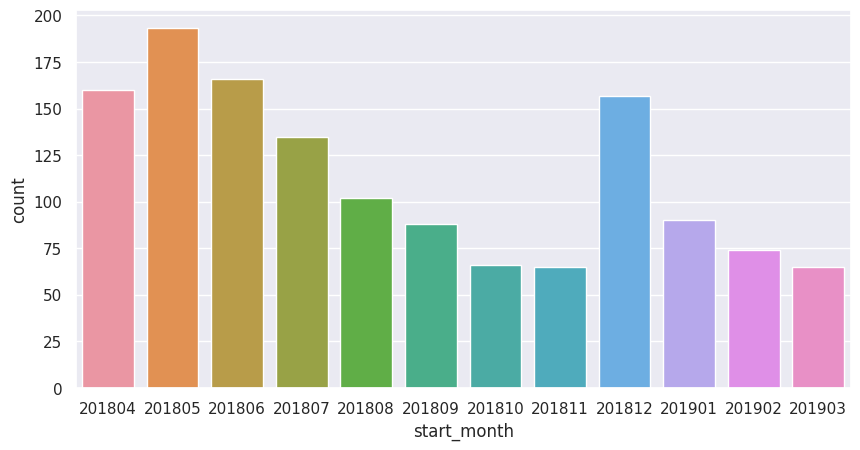

In [18]:
customer_start_new = customer.loc[customer['start_date']>pd.to_datetime('20180401')]
customer_start_new['start_month'] = customer['start_date'].dt.strftime('%Y%m')


fig, ax  = plt.subplots(figsize = (10,5), dpi=100)
sns.countplot(x='start_month', data=customer_start_new);

In [19]:
# 入会した人数
customer_start = customer.loc[customer['start_date']>pd.to_datetime('20180401')]
len(customer_start)

1361

In [20]:
customer['end_date'] = pd.to_datetime(customer['end_date'])
customer_newer = customer.loc[(customer['end_date']>=pd.to_datetime('20190331')) | (customer['end_date'].isna())]
len(customer_newer)

2953

In [21]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['month'] = uselog['usedate'].dt.strftime('%Y%m')
uselog.head()

,log_id,customer_id,usedate,month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [22]:
uselog_month = uselog.groupby(['month', 'customer_id'], as_index = False).count()
uselog_month.rename(columns={'log_id':'count'}, inplace=True)
del uselog_month['usedate']
uselog_month.head()

,month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [23]:
# 顧客毎に絞り込む．月々の利用回数について
uselog_customer = uselog_month.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [24]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', 'month', 'weekday'], as_index=False).count()[['customer_id', 'month', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id': 'count'}, inplace = True)
uselog_weekday

,customer_id,month,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [25]:
# 使用頻度フラグ作成
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]

In [26]:
uselog_weekday.head()

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5


In [27]:
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [28]:
customer = customer.merge(uselog_customer, on='customer_id', how='left')
customer = customer.merge(uselog_weekday[['customer_id', 'routine_flg']], on='customer_id', how='left')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [29]:
customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [30]:
# 会員期間(月単位)
from dateutil.relativedelta import relativedelta
customer['calc_date'] = customer['end_date']
customer['calc_date'] = customer['calc_date'].fillna(pd.to_datetime('20190430'))
customer['membership_period'] = 0
for i in range(len(customer)):
    delta = relativedelta(customer['calc_date'].iloc[i], customer['start_date'].iloc[i])
    customer['membership_period'].iloc[i] = delta.years*12 + delta.months
    

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
customer['membership_period'].unique()

array([47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 23, 35, 34, 33, 21,
       22, 32, 20, 31, 19, 18, 30, 29, 17, 28, 16, 27, 15, 26, 25, 13, 24,
       12, 11, 10, 14,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [32]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [33]:
customer.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,0.322042,8559.875954,5.333127,5.250596,7.823950,3.041269,0.814170,18.835878
std,0.467315,1968.128971,1.777533,1.874874,2.168959,1.951565,0.389016,13.848148
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,4.250000,4.000000,7.000000,2.000000,1.000000,7.000000
50%,0.000000,7500.000000,5.000000,5.000000,8.000000,3.000000,1.000000,15.000000
75%,1.000000,10500.000000,6.416667,6.500000,9.000000,4.000000,1.000000,30.000000
max,1.000000,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [34]:
customer.to_csv('Data100/customer.csv', index=False)

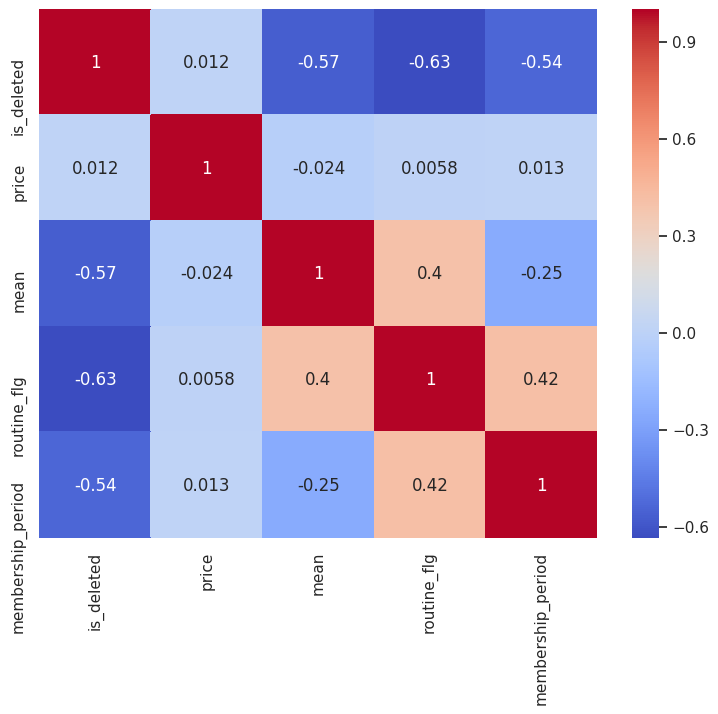

In [35]:
fig, ax = plt.subplots(figsize=(9,7), dpi=100)
sns.heatmap(customer.drop(columns=['min', 'max', 'median']).corr(), annot=True, cmap='coolwarm')

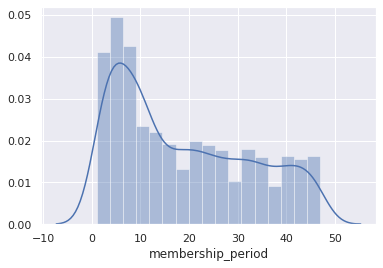

In [36]:
sns.distplot(customer['membership_period'], hist=True)